# AB-тестирование и логистическая регрессия. ДЗ в рамках курса Нетологии "Data Scientist: с нуля до middle"

## Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

- 1) Как критики относятся к спортивным играм?
- 2) Критикам нравятся больше игры на PC или на PS4?
- 3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    сформулируйте нулевую и альтернативную гипотезы;
    выберите пороговый уровень статистической значимости;
    опишите полученные результаты статистического теста.



In [163]:
import pandas as pd
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
# 1.Как критики относятся к спортивным играм?
#Для ответа на этот вопрос посмотрим среднюю оценку, которую ставят критики
#Избавимся от NaN значений, чтобы в дальнейшем провести статтест

import numpy as np
df_critic_score = df[np.logical_not(df['Critic_Score'].isna())]
df_critic_score['Critic_Score'].mean()

68.96767850559173

# 1. Как критики относятся к спортивным играм?

H0: Критики оценивают спортивные игры <= 68.97 баллов

H1: Критики оценивают спортивные игры выше 68.97 баллов



За alpha здесь и далее будем принимать 0.05. Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.

In [165]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df_critic_score[df_critic_score['Genre']== 'Sports']['Critic_Score'], df_critic_score['Critic_Score'].mean(), alternative='greater')

print(df_critic_score[df_critic_score['Genre']== 'Sports']['Critic_Score'].mean())
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, спортивные игры высоко ценятся критиками)')
else:
    print('Не отвергаем нулевую нулевую гипотезу(спортивные игры ценятся критиками не выше средней оценки)')

71.96817420435511
Ttest_1sampResult(statistic=7.470587451672033, pvalue=7.690444376155284e-14)
Отвергаем нулевую гипотезу, спортивные игры высоко ценятся критиками)


# 2. Критикам нравятся больше игры на PC или на PS4? 

H0: Критики одинаково относятся к играм на PC и на PS4 (различия в средней оценке статистически незначимы)

H1: Критики по-разному относятся к играм на PC и на PS4 (различия в средней оценке статистически значимы)

Здесь используется двухвыборочный двухсторонний критерий.  
    
    

In [166]:
df_pc = df_critic_score[df_critic_score['Platform']== 'PC']
df_ps4 = df_critic_score[df_critic_score['Platform']== 'PS4']

result = st.ttest_ind(df_pc['Critic_Score'], df_ps4['Critic_Score'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному относятся к играм на PC и на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Отвергаем нулевую гипотезу, критики по-разному относятся к играм на PC и на PS4


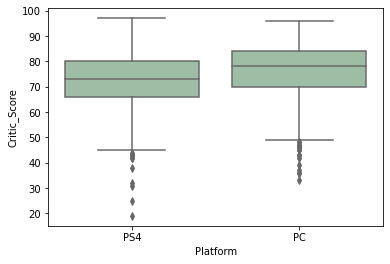

In [167]:
#Поскольку различия зафиксированы статтестом, определим к каким играм критики относятся лучше. 
#Построим боксплот и сравним средние веса.
from matplotlib import pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='Platform', y='Critic_Score', data = df_critic_score.query("Platform == 'PC' | Platform == 'PS4'"), color='#99c2a2')

plt.show()

**Средние оценки критиков для игр на PC выше, чем для игр на PS4**

# 3. Критикам больше нравятся стрелялки или стратегии?
H0: Критики одинаково относятся к шутерам и стратегиям (различия в средней оценке статистически незначимы)

H1: Критики по-разному относятся к шутерам и стратегиям (различия в средней оценке статистически значимы)



In [168]:
df_critic_score['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [169]:
df_shooter = df_critic_score[df_critic_score['Genre']== 'Shooter']
df_strategy = df_critic_score[df_critic_score['Genre']== 'Strategy']

#Будем использовать критерий Манна-Уитни 

#result = st.ttest_ind(df_shooter['Critic_Score'], df_strategy['Critic_Score'], equal_var=False)

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy


# Сравнение групп
stat, p = mannwhitneyu(df_shooter['Critic_Score'], df_strategy['Critic_Score']) 
print('Statistics=%.3f, p=%.3f' % (stat, p))

if (p < alpha):
    print('Отвергаем нулевую гипотезу, критики по-разному относятся к шутерам и стратегиям')
else:
    print('Не отвергаем нулевую гипотезу, различия в средней оценке статистически незначимы')

Statistics=136251.500, p=0.124
Не отвергаем нулевую гипотезу, различия в средней оценке статистически незначимы


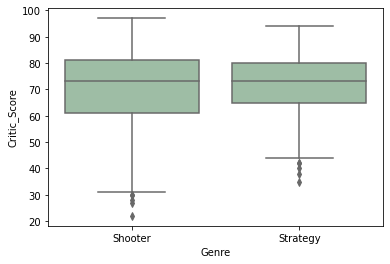

In [170]:
#Визуализация
ax = sns.boxplot(x='Genre', y='Critic_Score', data = df_critic_score.query("Genre == 'Shooter' | Genre == 'Strategy'"), color='#99c2a2')

plt.show()

**Различия в средних оценках критиков для стратегий и шутеров статистически незначимы**

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама.  


In [171]:
import glob
import pandas as pd
import re
df = pd.read_csv('C:\\Users\\Оляша\\Desktop\\Netology\\DZ\\3_Statistics\\8_Case_study\\spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [172]:
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [173]:
# удаление служебных символов
df['Message_words'] = df['Message'].apply(lambda x: re.sub('[\W_]+',' ', x))
df

,Category,Message,Message_words
0,ham,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,ham,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...
...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?,will ü b going to esplanade fr home
5569,ham,"pity, * was in mood for that. so...any other s...",pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i'd...,the guy did some bitching but i acted like i d...


In [174]:
#Разбиение на отдельные слова и удаление стоп-слов
df['Message_words'] = df['Message_words'].apply(lambda x: x.split())
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
df['Message_without_sw'] = df['Message_words'].apply(lambda x: [word for word in x if word not in stopwords_set])
df.head()

,Category,Message,Message_words,Message_without_sw
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


In [175]:
#Приведение слов к нормальной форме
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
df['Message_lemmatized_text'] = df['Message_without_sw'].apply(lambda x:[wordnet_lemmatizer.lemmatize(word) for word in x])
df.head()

,Category,Message,Message_words,Message_without_sw,Message_lemmatized_text
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"


In [176]:
#Сборка сообщения из скорректированных слов
def join_words(word):
    "Эта функция склеивает слова в предложение"
    return ' '.join([x for x in word])

df['Message_clean'] = df['Message_lemmatized_text'].apply(join_words)
df.drop(columns=['Message', 'Message_words', 'Message_without_sw', 'Message_lemmatized_text'], inplace = True)
df.head()

,Category,Message_clean
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [177]:
#Преобразование сообщений в вектора TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message_clean)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [178]:
cond = (df['Category'] == 'spam')
df.loc[cond,'Category_massage'] = 1
df.loc[~cond,'Category_massage'] = 0
df.head()

,Category,Message_clean,Category_massage
0,ham,go jurong point crazy available bugis n great ...,0.0
1,ham,ok lar joking wif u oni,0.0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1.0
3,ham,u dun say early hor u c already say,0.0
4,ham,nah think go usf life around though,0.0


In [179]:
#Разделение данных на тестовые и тренирововчные
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, df.Category_massage, test_size =0.30, random_state = 42)


In [180]:
#Построение модели логистической регрессии
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [181]:
lr.predict(x_test)

array([0., 0., 0., ..., 0., 1., 0.])

In [182]:
#Оценка точности модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(x_test))

0.958732057416268

In [183]:
#Описание результатов полученной модели с помощью confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(x_test))

array([[1445,    3],
       [  66,  158]], dtype=int64)

**Число истинных результатов: 1445 неспам-писем + 158 спам-писем. 
Число ложных результатов (ошибочно отнесено к неверным категориям): 66 + 3 писем.**

In [184]:
#Построим датафрейм, который будет содержать все исходные тексты сообщений, 
#классифицированные неправильно (с указанием фактического и предсказанного)

#Соотнесем с исходным датафреймом тестовые данные
df = df[df.index.isin(y_test.index)]

In [185]:
#Перенесем в датафрейм прогнозные данные модели
forecast = pd.Series(lr.predict(x_test), name = 'Forecast').to_frame()

In [186]:
#Соединим полученные датафреймы
df_finally = pd.concat([df.reset_index(), forecast], axis=1)
df_finally

,index,Category,Message_clean,Category_massage,Forecast
0,8,spam,winner valued network customer selected receiv...,1.0,0.0
1,12,spam,urgent 1 week free membership 100 000 prize ja...,1.0,0.0
2,15,spam,xxxmobilemovieclub use credit click wap link n...,1.0,0.0
3,17,ham,eh u remember 2 spell name yes v naughty make ...,0.0,0.0
4,19,spam,england v macedonia dont miss goal team news t...,1.0,0.0
...,...,...,...,...,...
1667,5558,ham,sorry call later,0.0,0.0
1668,5561,ham,get dump heap mom decided come lowes boring,0.0,1.0
1669,5565,ham,huh lei,0.0,0.0
1670,5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,1.0,1.0


In [187]:
df_finally[df_finally.Category_massage != df_finally.Forecast]

,index,Category,Message_clean,Category_massage,Forecast
0,8,spam,winner valued network customer selected receiv...,1.0,0.0
1,12,spam,urgent 1 week free membership 100 000 prize ja...,1.0,0.0
2,15,spam,xxxmobilemovieclub use credit click wap link n...,1.0,0.0
4,19,spam,england v macedonia dont miss goal team news t...,1.0,0.0
14,47,ham,fair enough anything going,0.0,1.0
...,...,...,...,...,...
1633,5446,ham,back good journey let know need receipt shall ...,0.0,1.0
1634,5450,ham,sac need carry,0.0,1.0
1638,5457,ham,arun u transfr amt,0.0,1.0
1657,5524,spam,awarded sipix digital camera call 09061221061 ...,1.0,0.0
